In [ ]:
# install spark and its dependencies
# NOTE: This and the following 3 cells need to be executed everytime you connect to Google Colab
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar -xvzf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark

# setup required environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

# import required modules
import findspark
findspark.init()
! pip install findspark
import itertools
import sys
import pyspark
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType
from pyspark.sql.functions import col
from IPython.display import display
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession


spark-2.4.6-bin-hadoop2.7/
spark-2.4.6-bin-hadoop2.7/bin/
spark-2.4.6-bin-hadoop2.7/bin/pyspark.cmd
spark-2.4.6-bin-hadoop2.7/bin/spark-submit
spark-2.4.6-bin-hadoop2.7/bin/spark-submit.cmd
spark-2.4.6-bin-hadoop2.7/bin/spark-class2.cmd
spark-2.4.6-bin-hadoop2.7/bin/spark-shell2.cmd
spark-2.4.6-bin-hadoop2.7/bin/pyspark2.cmd
spark-2.4.6-bin-hadoop2.7/bin/docker-image-tool.sh
spark-2.4.6-bin-hadoop2.7/bin/run-example.cmd
spark-2.4.6-bin-hadoop2.7/bin/spark-submit2.cmd
spark-2.4.6-bin-hadoop2.7/bin/beeline.cmd
spark-2.4.6-bin-hadoop2.7/bin/beeline
spark-2.4.6-bin-hadoop2.7/bin/spark-shell
spark-2.4.6-bin-hadoop2.7/bin/find-spark-home
spark-2.4.6-bin-hadoop2.7/bin/sparkR2.cmd
spark-2.4.6-bin-hadoop2.7/bin/find-spark-home.cmd
spark-2.4.6-bin-hadoop2.7/bin/sparkR
spark-2.4.6-bin-hadoop2.7/bin/spark-class
spark-2.4.6-bin-hadoop2.7/bin/spark-sql2.cmd
spark-2.4.6-bin-hadoop2.7/bin/load-spark-env.cmd
spark-2.4.6-bin-hadoop2.7/bin/run-example
spark-2.4.6-bin-hadoop2.7/bin/spark-sql
spark-2.4.6-b

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
spark = SparkSession.builder.appName('AnimeRecommondation').getOrCreate()

In [ ]:
#Importing csv files and showing dimensions

In [ ]:
data_anime = spark.read.csv('anime.csv',header=True,inferSchema=True)
data_anime.head(5)

[Row(anime_id=32281, name='Kimi no Na wa.', genre='Drama, Romance, School, Supernatural', type='Movie', episodes='1', rating=9.37, members=200630),
 Row(anime_id=5114, name='Fullmetal Alchemist: Brotherhood', genre='Action, Adventure, Drama, Fantasy, Magic, Military, Shounen', type='TV', episodes='64', rating=9.26, members=793665),
 Row(anime_id=28977, name='Gintama°', genre='Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen', type='TV', episodes='51', rating=9.25, members=114262),
 Row(anime_id=9253, name='Steins;Gate', genre='Sci-Fi, Thriller', type='TV', episodes='24', rating=9.17, members=673572),
 Row(anime_id=9969, name='Gintama&#039;', genre='Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen', type='TV', episodes='51', rating=9.16, members=151266)]

In [ ]:
data_anime.count()

12294

In [ ]:
data_anime.show(5)

+--------+--------------------+--------------------+-----+--------+------+-------+
|anime_id|                name|               genre| type|episodes|rating|members|
+--------+--------------------+--------------------+-----+--------+------+-------+
|   32281|      Kimi no Na wa.|Drama, Romance, S...|Movie|       1|  9.37| 200630|
|    5114|Fullmetal Alchemi...|Action, Adventure...|   TV|      64|  9.26| 793665|
|   28977|            Gintama°|Action, Comedy, H...|   TV|      51|  9.25| 114262|
|    9253|         Steins;Gate|    Sci-Fi, Thriller|   TV|      24|  9.17| 673572|
|    9969|       Gintama&#039;|Action, Comedy, H...|   TV|      51|  9.16| 151266|
+--------+--------------------+--------------------+-----+--------+------+-------+
only showing top 5 rows



In [ ]:
print((data_anime.count(), len(data_anime.columns))) # Data Dimensions

(12294, 7)


In [ ]:
data_anime.printSchema()

root
 |-- anime_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- type: string (nullable = true)
 |-- episodes: string (nullable = true)
 |-- rating: double (nullable = true)
 |-- members: integer (nullable = true)



In [ ]:
data_rating = spark.read.csv('rating.csv',header=True)
filterRatingsDF = data_rating.filter("rating >= 0")
data_rating.count()

7813737

In [ ]:
data_rating.show(15)

+-------+--------+------+
|user_id|anime_id|rating|
+-------+--------+------+
|      1|      20|    -1|
|      1|      24|    -1|
|      1|      79|    -1|
|      1|     226|    -1|
|      1|     241|    -1|
|      1|     355|    -1|
|      1|     356|    -1|
|      1|     442|    -1|
|      1|     487|    -1|
|      1|     846|    -1|
|      1|     936|    -1|
|      1|    1546|    -1|
|      1|    1692|    -1|
|      1|    1836|    -1|
|      1|    2001|    -1|
+-------+--------+------+
only showing top 15 rows



In [ ]:
print((data_rating.count(), len(data_rating.columns)))

(7813737, 3)


In [ ]:
#Data_Processing

In [ ]:
data_rating = data_rating.filter(data_rating['rating'] >= 0) # Filter Ratings because  0 ratings are not necessary in this scenario 
data_rating.show()

+-------+--------+------+
|user_id|anime_id|rating|
+-------+--------+------+
|      1|    8074|    10|
|      1|   11617|    10|
|      1|   11757|    10|
|      1|   15451|    10|
|      2|   11771|    10|
|      3|      20|     8|
|      3|     154|     6|
|      3|     170|     9|
|      3|     199|    10|
|      3|     225|     9|
|      3|     341|     6|
|      3|     430|     7|
|      3|     527|     7|
|      3|     552|     7|
|      3|     813|    10|
|      3|    1119|     7|
|      3|    1121|     7|
|      3|    1122|     7|
|      3|    1132|     8|
|      3|    1292|     6|
+-------+--------+------+
only showing top 20 rows



In [ ]:
print((data_rating.count(), len(data_rating.columns))) # check data again after removing the below 0 ratings 

(7813737, 3)


In [ ]:
data_rating.printSchema()

root
 |-- user_id: integer (nullable = true)
 |-- anime_id: integer (nullable = true)
 |-- rating: integer (nullable = true)



In [ ]:
data_anime.describe(["episodes"]).show() # Check the summary of column Episodes

+-------+------------------+
|summary|          episodes|
+-------+------------------+
|  count|             12294|
|   mean|12.382549774134182|
| stddev| 46.86535196440979|
|    min|                 1|
|    max|           Unknown|
+-------+------------------+



In [ ]:
data_anime.describe().show() #Output of the describe

+-------+------------------+-----------------+------+-----+------------------+-----------------+-----------------+
|summary|          anime_id|             name| genre| type|          episodes|           rating|          members|
+-------+------------------+-----------------+------+-----+------------------+-----------------+-----------------+
|  count|             12294|            12294| 12232|12269|             12294|            12064|            12294|
|   mean|14058.221652838783|         166778.5|  null| null|12.382549774134182|6.473901690981445|18071.33886448674|
| stddev|11455.294700988177|330891.6746051493|  null| null| 46.86535196440979|1.026746306898068|54820.67692490701|
|    min|                 1|    &quot;0&quot;|Action|Movie|                 1|             1.67|                5|
|    max|             34527|                ◯|  Yaoi|   TV|           Unknown|             10.0|          1013917|
+-------+------------------+-----------------+------+-----+------------------+--

In [ ]:
data_anime.filter(data_anime["type"]=="TV").show() # TV type data

+--------+--------------------+--------------------+----+--------+------+-------+
|anime_id|                name|               genre|type|episodes|rating|members|
+--------+--------------------+--------------------+----+--------+------+-------+
|    5114|Fullmetal Alchemi...|Action, Adventure...|  TV|      64|  9.26| 793665|
|   28977|            Gintama°|Action, Comedy, H...|  TV|      51|  9.25| 114262|
|    9253|         Steins;Gate|    Sci-Fi, Thriller|  TV|      24|  9.17| 673572|
|    9969|       Gintama&#039;|Action, Comedy, H...|  TV|      51|  9.16| 151266|
|   32935|Haikyuu!!: Karasu...|Comedy, Drama, Sc...|  TV|      10|  9.15|  93351|
|   11061|Hunter x Hunter (...|Action, Adventure...|  TV|     148|  9.13| 425855|
|   15417|Gintama&#039;: En...|Action, Comedy, H...|  TV|      13|  9.11|  81109|
|    4181|Clannad: After Story|Drama, Fantasy, R...|  TV|      24|  9.06| 456749|
|     918|             Gintama|Action, Comedy, H...|  TV|     201|  9.04| 336376|
|    2904|Code G

In [ ]:
for col in data_rating.columns: 
  print(col, '\t', "with null values: ", data_rating.filter(data_rating[col].isNull()).count())

user_id 	 with null values:  0
anime_id 	 with null values:  0
rating 	 with null values:  0


In [ ]:
for col in data_anime.columns: 
  print(col, '\t', "with null values: ", data_anime.filter(data_anime[col].isNull()).count())

anime_id 	 with null values:  0
name 	 with null values:  0
genre 	 with null values:  62
type 	 with null values:  25
episodes 	 with null values:  0
rating 	 with null values:  230
members 	 with null values:  0


In [ ]:
data_anime = data_anime.filter(data_anime['rating'].isNotNull()) # valid values
data_anime.show()

+--------+--------------------+--------------------+-----+--------+------+-------+
|anime_id|                name|               genre| type|episodes|rating|members|
+--------+--------------------+--------------------+-----+--------+------+-------+
|   32281|      Kimi no Na wa.|Drama, Romance, S...|Movie|       1|  9.37| 200630|
|    5114|Fullmetal Alchemi...|Action, Adventure...|   TV|      64|  9.26| 793665|
|   28977|            Gintama°|Action, Comedy, H...|   TV|      51|  9.25| 114262|
|    9253|         Steins;Gate|    Sci-Fi, Thriller|   TV|      24|  9.17| 673572|
|    9969|       Gintama&#039;|Action, Comedy, H...|   TV|      51|  9.16| 151266|
|   32935|Haikyuu!!: Karasu...|Comedy, Drama, Sc...|   TV|      10|  9.15|  93351|
|   11061|Hunter x Hunter (...|Action, Adventure...|   TV|     148|  9.13| 425855|
|     820|Ginga Eiyuu Densetsu|Drama, Military, ...|  OVA|     110|  9.11|  80679|
|   15335|Gintama Movie: Ka...|Action, Comedy, H...|Movie|       1|   9.1|  72534|
|   

In [ ]:
genre1 = data_anime.filter(data_anime['genre'].isNotNull())  # genre without null

In [ ]:
for col in genre1.columns:
  print(col, '\t', "with null values: ", genre1.filter(genre1[col].isNull()).count())

anime_id 	 with null values:  0
name 	 with null values:  0
genre 	 with null values:  0
type 	 with null values:  22
episodes 	 with null values:  0
rating 	 with null values:  215
members 	 with null values:  0


In [ ]:
data_anime=data_anime.replace('Unknown','0') # Replace the values of Unknown values with 0 in episodes 


In [ ]:
for col in data_anime.columns:
  print(col, '\t', "with Unknown values: ", data_anime.filter(data_anime[col]=="Unknown").count())

anime_id 	 with Unknown values:  0
name 	 with Unknown values:  0
genre 	 with Unknown values:  0
type 	 with Unknown values:  0
episodes 	 with Unknown values:  0
rating 	 with Unknown values:  0
members 	 with Unknown values:  0


In [ ]:
data_anime.describe(["episodes"]).show()

+-------+------------------+
|summary|          episodes|
+-------+------------------+
|  count|             12294|
|   mean|12.040100862209208|
| stddev| 46.25729860582594|
|    min|                 0|
|    max|                99|
+-------+------------------+



In [ ]:
#Analysis

In [ ]:
data_anime_pandas = data_anime.toPandas()

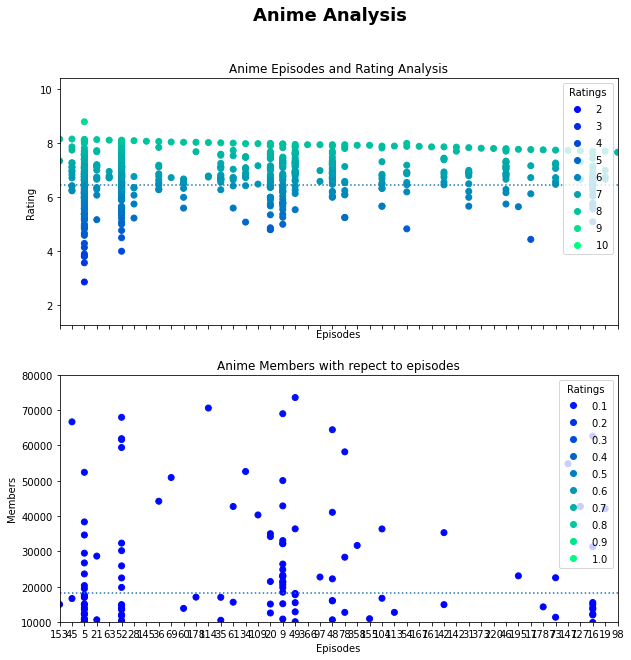

In [ ]:
# Customization in x and y axis
fig , (ax0,ax1) = plt.subplots(nrows = 2,
                              ncols = 1,
                              figsize = (10,10),
                              sharex=True)

# Adding data
scatter = ax0.scatter(x=data_anime_pandas["episodes"],
                     y=data_anime_pandas["rating"],
                     c=data_anime_pandas["rating"],
                     cmap="winter");
#  ax0 customized
ax0.set(title="Anime Episodes and Rating Analysis",
       xlabel="Episodes",
       ylabel="Rating")
#  x axis limits 
ax0.set_xlim([1,95])

ax0.legend(*scatter.legend_elements(),title="Ratings")
# meanline
ax0.axhline(data_anime_pandas["rating"].mean(),linestyle=':')



# Adding data to ax1
scatter = ax1.scatter(x=data_anime_pandas["episodes"],
                     y=data_anime_pandas["members"],
                     c=data_anime_pandas["members"],
                      cmap="winter");
# Customized ax1
ax1.set(title="Anime Members with repect to episodes",
       xlabel="Episodes",
       ylabel="Members")
# Change x1 limits 
ax1.set_xlim([50,95])
ax1.set_ylim([10000,80000])
# Add legend to ax1
ax1.legend(*scatter.legend_elements(),title="Ratings")
# Add a meanline
ax1.axhline(y=data_anime_pandas["members"].mean(),linestyle=':');

# Title
fig.suptitle("Anime Analysis",fontsize=18,fontweight="bold");

# Fig
fig.savefig("anime.png")

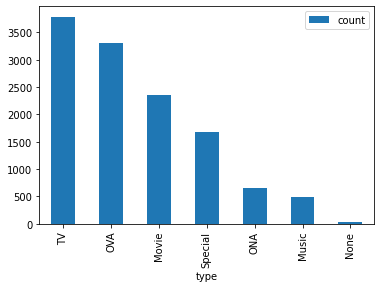

In [ ]:
data_anime.groupBy('type').count() \
.sort('count', ascending=False) \
.toPandas().plot.bar(x='type', y='count');


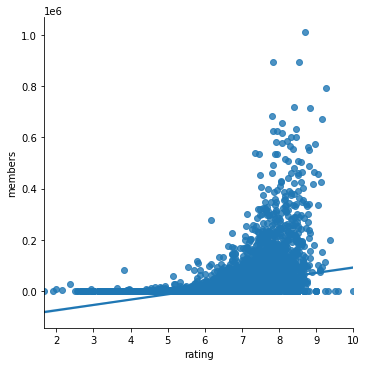

In [ ]:
import seaborn as sns
sns.lmplot(y = 'members', x = 'rating', data=data_anime_pandas)

In [ ]:
episode_g = data_anime.select(['episodes']).sample(False, 0.5, 42)
pandas_episode = episode_g.toPandas()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


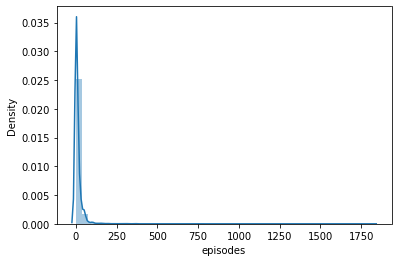

In [ ]:
sns.distplot(pandas_episode)
plt.xlabel('episodes') 
plt.show()

In [ ]:
members_g = data_anime.select(['members']).sample(False, 0.25, 35)
pandas_member = members_g.toPandas()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


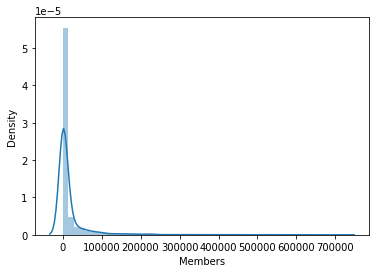

In [ ]:
sns.distplot(pandas_member)
plt.xlabel('Members') 
plt.show()

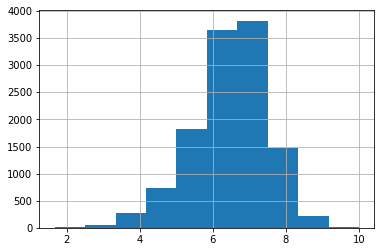

In [ ]:
data_anime.toPandas()['rating'].hist();

In [ ]:
graph1 = data_rating.groupBy("rating").count()

In [ ]:
import matplotlib.pyplot as plt
x_axis_1 = graph1.select("rating").rdd.flatmap(lamda x: x).collect()
y_axis_1 = graph1.select("count").rdd.flatmap(lambda x: x).collect()
fig1 = plt.figure(figsize=(9, 9))
fig1.suptitle('Type', fontsize=12)
ax = fig1.add_subplot(100)
ax.set_xlabel('Type')
ax.set_ylabel('Count')
ax.bar(x_axis_1, y_axis_1, fc='darksalmon', align='center')
plt.show()

SyntaxError: ignored

In [ ]:
#Task 1

In [ ]:
animeids1Krating = data_rating.groupBy('anime_id') \
.count() \
.filter('count >= 1000') \
.withColumnRenamed('count', 'user_ratings')


In [ ]:
animeids1Krating = animeids1Krating \
.join(data_anime, animeids1Krating.anime_id == data_anime.anime_id) \
.drop(animeids1Krating.anime_id)

In [ ]:
animeids1Krating.sort('rating', ascending=False).limit(1) \
.select('anime_id', 'name', 'rating').show()

+--------+--------------+------+
|anime_id|          name|rating|
+--------+--------------+------+
|   32281|Kimi no Na wa.|  9.37|
+--------+--------------+------+



In [ ]:
#Task 2

In [ ]:
animeids1Krating.filter('rating > 9').count()

11

In [ ]:
#Task 3

In [ ]:
animeids1Krating.sort('user_ratings', ascending=False).limit(1) \
.select('anime_id', 'name', 'user_ratings','members').show() 

+--------+----------+------------+-------+
|anime_id|      name|user_ratings|members|
+--------+----------+------------+-------+
|    1535|Death Note|       34226|1013917|
+--------+----------+------------+-------+



In [ ]:
#Task 4

In [ ]:
data_rating = data_rating.filter(data_rating['rating'] >= 0)

In [ ]:
from pyspark.sql import functions as F
q4_result1 = data_rating.select("anime_id", "rating", 'user_id').filter('user_id = 8086')
q4_result2 = spark.createDataFrame(q4_result1.orderBy(F.col('rating').desc()).take(3))
q4Fresult = q4_result2.join(data_anime, q4_result2['anime_id'] == data_anime['anime_id']).select(q4_result2['anime_id'], data_anime['name'])
q4Fresult.show(3)

+--------+-----------------+
|anime_id|             name|
+--------+-----------------+
|      47|            Akira|
|      60|    Chrno Crusade|
|      71|Full Metal Panic!|
+--------+-----------------+



In [ ]:
#Task 5

In [ ]:
q5_result = data_anime.alias('a').join(data_rating.alias('b'), F.col('a.anime_id') == F.col('b.anime_id')).select([F.col('a.anime_id'), F.col('a.name'), F.col('b.user_id')]).filter('anime_id = 4935')
q5_result.show(3)

+--------+----------+-------+
|anime_id|      name|user_id|
+--------+----------+-------+
|    4935|Ikkyuu-san|   1822|
|    4935|Ikkyuu-san|  12725|
|    4935|Ikkyuu-san|  13539|
+--------+----------+-------+
only showing top 3 rows

